In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dfx=pd.read_csv("./Linear_X_Train.csv")
dfy=pd.read_csv("./Linear_Y_Train.csv")

In [7]:
dfx.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [8]:
dfy.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [9]:
x=dfx.values
y=dfy.values
print(x,y)

[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]] [[-9.11011171e-02]
 [-5.34677208e+01]
 [ 7.54570088e+01]
 ...
 [-3.49832749e+01]
 [ 1.45206092e+02]
 [-1.71244939e+01]]


## Algorithm Linear Regression

In [17]:
def hypothesis(x,theta):
    
    y_=theta[0]+theta[1]*x
    
    return y_

def gradient(X,Y,theta):
    
    m=X.shape[0]
    
    grad=np.zeros((2,))
    
    for i in range(m):
        
        x=X[i]
        
        y_=hypothesis(X[i],theta)
        
        y=Y[i]
        
        grad[0]+=y_- y
        
        grad[1]+=(y_ - y)*x
    
    return grad/m

def error(X,Y,theta):
    
    m=X.shape[0]
    
    total_error=0.0
    
    for i in range(m):
        
        y_ = hypothesis(X[i],theta)
        
        total_error += (y_ - Y[i])**2
        
    return total_error/m

def gradientDescent(X,Y,learning_rate=0.1,iterations=100):
    
    theta=np.zeros((2,))
    
    error_list=[]
    
    for i in range(iterations):
        
        grad=gradient(X,Y,theta)
        
        e=error(X,Y,theta)
        
        error_list.append(e)
        
        theta[0]=theta[0] - learning_rate*grad[0]
        
        theta[1]=theta[1] - learning_rate*grad[1]
        
    return theta,error_list
    
    
    

In [18]:
theta,error_=gradientDescent(x,y)

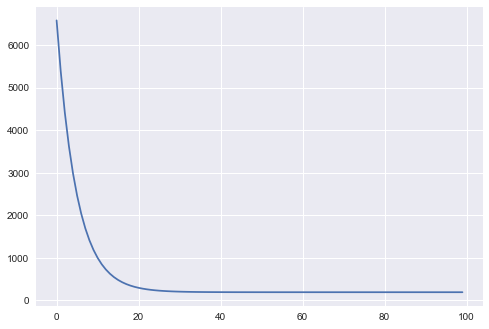

In [25]:
plt.style.use("seaborn")
plt.plot(error_)
plt.show()

In [28]:
y_=hypothesis(x,theta)
y_

array([[-19.57419108],
       [-43.69635897],
       [ 86.48322254],
       ...,
       [-20.85126634],
       [138.69991375],
       [-35.87967507]])

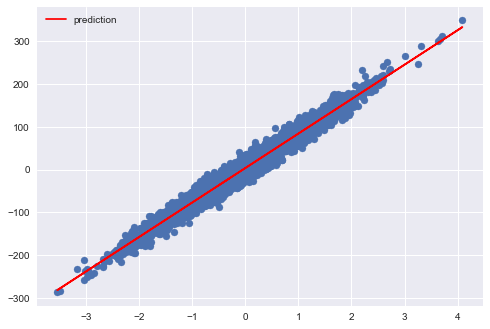

In [34]:
plt.scatter(x,y)
plt.plot(x,y_,c='red',label='prediction')
plt.legend()
plt.show()

In [47]:
x_test=pd.read_csv("./Linear_X_Test.csv").values
y_test=hypothesis(x_test,theta)

output = pd.DataFrame({'y':y_test[:,0]})
output.to_csv('y_predictionUsingAlgorithm.csv', index=False)

In [48]:
y_test

array([[-147.52439132],
       [ -66.26570453],
       [-200.05620583],
       ...,
       [  14.03673979],
       [ -18.66650943],
       [ -51.07517461]])

## Computing Scoring
> r2 squared or coefficent of Determination

In [54]:
def r2square(Y,Y_):
    
    num=np.sum((Y-Y_)**2)
    
    denom=np.sum((Y-Y_.mean())**2)
    
    score=(1-num/denom)
    
    return score*100

In [60]:
r2square(y,y_)

97.09612220885624